In [1]:
%load_ext autoreload

In [3]:
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import minopy_utilities as mnp
import mintpy
from osgeo import gdal
from mintpy.utils import plot as pp
from mintpy.utils import readfile, utils as ut 
import h5py
import cartopy.crs as ccrs
from scipy import ndimage
from mintpy import view
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

view.py /Users/Sara/data/test/PichinchaSenDT142/miaplpy/inverted/tempCoh_full --notitle --fontsize 12 --nocbar --alpha 0.9 -u cm --noverbose --noreference -v 0 1 -c gray
Un-scalable display unit: cm
view.py /Users/Sara/data/test/PichinchaSenDT142/miaplpy/inverted/tempCoh_average --notitle --fontsize 12 --nocbar --alpha 0.9 -u cm --noverbose --noreference -v 0 1 -c gray
Un-scalable display unit: cm


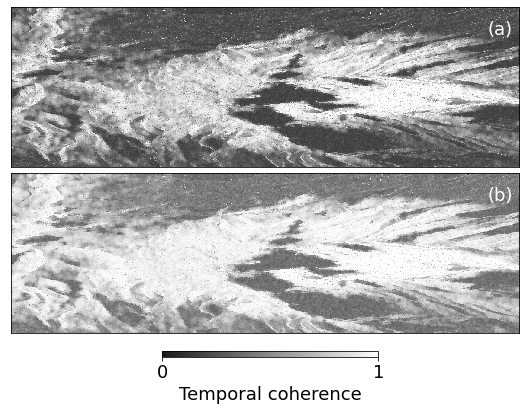

In [66]:
plt.rcParams["font.size"] = "18"


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))


# options for view.py

opt = ' --notitle --fontsize 12 --nocbar --alpha 0.9 '
opt += ' -u cm '
opt += ' --noverbose --noreference' 


ax = axs[0]
data_pich = '/Users/Sara/data/test/PichinchaSenDT142/miaplpy/inverted/tempCoh_full'

cmd = 'view.py {} '.format(data_pich) + opt 
cmd += ' -v 0 1 -c gray'


d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]
ax.set_xticks([])
ax.set_yticks([])

ax.text(1580,90, '(a)', color='white')

ax = axs[1]
data_pich = '/Users/Sara/data/test/PichinchaSenDT142/miaplpy/inverted/tempCoh_average'

cmd = 'view.py {} '.format(data_pich) + opt 
cmd += ' -v 0 1 -c gray'


d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


cax1 = fig.add_axes([0.37, 0.07, 0.3, 0.013])
cbar = plt.colorbar(im, cax=cax1, ticks=[0, 1], orientation='horizontal')
cbar.set_label('Temporal coherence', color = "black")
cbar.ax.set_xticklabels([r'0', r'1'])
cbar.ax.xaxis.set_label_position('bottom') 
cbar.ax.xaxis.set_tick_params(color='black')
cbar.outline.set_edgecolor('black')

ax.set_xticks([])
ax.set_yticks([])
ax.text(1580,90, '(b)', color='white')


fig.subplots_adjust(hspace=0.04, wspace=0.02)

out_dir = './out_figures'

plt.savefig(out_dir +'/temporal_coherences.png', bbox_inches='tight', dpi=300) 
